# Abstract
Penelitian ini bertujuan untuk memprediksi jumlah pendapatan Indonesia dari ekspor non-migas untuk tahun 2024 dan menganalisis hubungan antara harga crude oil dan ekspor migas terhadap ekspor non-migas. Pendapatan dari ekspor non-migas memiliki peran yang signifikan dalam pertumbuhan ekonomi Indonesia. Metode time series dengan pendekatan Vector Autoregressive (VAR) digunakan untuk memodelkan hubungan simultan antara variabel jumlah pendapatan dari ekspor migas dan non migas serta harga crude oil.

Data nilai ekspor migas dan non-migas tahun 2010-2023 dari Badan Pusat Statistik (BPS) dan data harga crude oil dari Yahoo Finance akan digunakan dalam analisis ini. Dengan menggunakan metode VAR, diharapkan dapat memberikan prediksi yang akurat tentang jumlah pendapatan dari ekspor non-migas untuk tahun 2024. Selain itu, analisis ini juga akan mengungkapkan apakah terdapat hubungan antara harga crude oil, ekspor migas, dan ekspor non-migas Indonesia. Hasil akhir setelah mendapat prediksi akan dibarengi dengan rekomendasi komoditi ekspor non-migas yang dapat digunakan pihak-pihak yang ikut serta dalam kegiatan ekspor Indonesia di tahun 2024.

Hasil penelitian ini memberikan manfaat yang signifikan dalam pemahaman faktor-faktor yang mempengaruhi pertumbuhan ekonomi Indonesia dan rekomendasi komoditi ekspor non-migas untuk pihak terkait. Informasi yang diperoleh dari penelitian ini akan membantu pihak berwenang dalam merencanakan kebijakan yang efektif untuk meningkatkan pertumbuhan ekonomi, mendorong investasi, dan meningkatkan kesejahteraan masyarakat secara berkelanjutan.

**Kata kunci:** *ekspor non-migas, harga crude oil, prediksi pendapatan, time series, Vector Autoregressive (VAR), rekomendasi komoditi ekspor, pertumbuhan ekonomi.*

# Library Setup

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# from pylab import rcParams

# Load the Data

In [8]:
# Load in the dataset
df_ekspor = pd.read_csv("Datasets/Transposed-Nilai-Ekspor-Migas-Nonmigas - Transposed-Nilai-Ekspor-Migas-Nonmigas.csv")
df_ekspor

,Komponen,Migas,Non Migas,Jumlah
0,January-1993,864.3,2137.6,3001.9
1,February-1993,767.5,2125,2892.5
2,March-1993,892.2,2116.3,3008.5
3,April-1993,744,2213.5,2957.5
4,May-1993,888.3,2229.7,3118
...,...,...,...,...
367,August-2023,-,-,-
368,September-2023,-,-,-
369,October-2023,-,-,-
370,November-2023,-,-,-


In [9]:
df_ekspor.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 372 entries, 0 to 371
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Komponen   372 non-null    object
 1   Migas      372 non-null    object
 2   Non Migas  372 non-null    object
 3   Jumlah     372 non-null    object
dtypes: object(4)
memory usage: 11.8+ KB


In [10]:
df_crude_oil = pd.read_csv("Datasets/Harga Crude Oil Harian - Harga Crude Oil Harian.csv")
df_crude_oil

,Date,Open,High,Low,Close*,Adj Close**,Volume
0,20-Jun-23,71.45,72.09,69.65,70.5,70.5,"99,185"
1,19-Jun-23,-,-,-,-,-,-
2,16-Jun-23,70.55,71.89,69.95,71.78,71.78,"99,185"
3,15-Jun-23,68.7,70.96,67.97,70.62,70.62,"115,613"
4,14-Jun-23,69.35,70.49,68.07,68.27,68.27,"304,449"
...,...,...,...,...,...,...,...
5809,30-Aug-00,32.75,33.4,32.1,33.4,33.4,"79,214"
5810,29-Aug-00,32.82,33.03,32.56,32.72,32.72,"49,131"
5811,28-Aug-00,32.04,32.92,31.86,32.87,32.87,"46,770"
5812,25-Aug-00,31.7,32.1,31.32,32.05,32.05,"44,601"


In [11]:
df_crude_oil.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5814 entries, 0 to 5813
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Date         5814 non-null   object
 1   Open         5814 non-null   object
 2   High         5814 non-null   object
 3   Low          5814 non-null   object
 4   Close*       5814 non-null   object
 5   Adj Close**  5814 non-null   object
 6   Volume       5814 non-null   object
dtypes: object(7)
memory usage: 318.1+ KB


# Data Preprocessing

In [12]:
df_crude_oil = df_crude_oil[['Date', 'High']].copy()
df_crude_oil

,Date,High
0,20-Jun-23,72.09
1,19-Jun-23,-
2,16-Jun-23,71.89
3,15-Jun-23,70.96
4,14-Jun-23,70.49
...,...,...
5809,30-Aug-00,33.4
5810,29-Aug-00,33.03
5811,28-Aug-00,32.92
5812,25-Aug-00,32.1


## Rename column


In [13]:
df_ekspor = df_ekspor.rename(columns={'Komponen': 'Date'})
df_crude_oil = df_crude_oil.rename(columns={'High': 'Crude Oil'})

In [14]:
df_ekspor.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 372 entries, 0 to 371
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Date       372 non-null    object
 1   Migas      372 non-null    object
 2   Non Migas  372 non-null    object
 3   Jumlah     372 non-null    object
dtypes: object(4)
memory usage: 11.8+ KB


In [15]:
df_crude_oil.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5814 entries, 0 to 5813
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Date       5814 non-null   object
 1   Crude Oil  5814 non-null   object
dtypes: object(2)
memory usage: 91.0+ KB


## Convert date to DateTime

In [16]:
# Convert date into Datetime
df_ekspor['Date']=pd.to_datetime(df_ekspor['Date'])
df_crude_oil['Date']=pd.to_datetime(df_crude_oil['Date'])

C:\Users\Bima\AppData\Local\Temp\ipykernel_4516\2269563476.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df_ekspor['Date']=pd.to_datetime(df_ekspor['Date'])
C:\Users\Bima\AppData\Local\Temp\ipykernel_4516\2269563476.py:3: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df_crude_oil['Date']=pd.to_datetime(df_crude_oil['Date'])


In [17]:
df_ekspor.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 372 entries, 0 to 371
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       372 non-null    datetime64[ns]
 1   Migas      372 non-null    object        
 2   Non Migas  372 non-null    object        
 3   Jumlah     372 non-null    object        
dtypes: datetime64[ns](1), object(3)
memory usage: 11.8+ KB


In [18]:
df_crude_oil.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5814 entries, 0 to 5813
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       5814 non-null   datetime64[ns]
 1   Crude Oil  5814 non-null   object        
dtypes: datetime64[ns](1), object(1)
memory usage: 91.0+ KB


## Replace '-' with NaN in 'Migas' column

In [19]:
df_ekspor = df_ekspor.replace('-', np.nan)
df_crude_oil = df_crude_oil.replace('-', np.nan)

## Remove rows with NaN values


In [20]:
# Count NaN values in each column
nan_counts = df_ekspor.isna().sum()
nan_counts

Date         0
Migas        8
Non Migas    8
Jumlah       8
dtype: int64

In [21]:
df_ekspor = df_ekspor.dropna()

In [22]:
# Count NaN values in each column
nan_counts = df_ekspor.isna().sum()
nan_counts

Date         0
Migas        0
Non Migas    0
Jumlah       0
dtype: int64

## Convert to numeric

In [23]:
# Convert column to float
df_ekspor['Migas'] = df_ekspor['Migas'].astype(float)
df_ekspor['Non Migas'] = df_ekspor['Non Migas'].astype(float)
df_crude_oil['Crude Oil'] = df_crude_oil['Crude Oil'].astype(float)

In [24]:
df_ekspor.info()

<class 'pandas.core.frame.DataFrame'>
Index: 364 entries, 0 to 363
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       364 non-null    datetime64[ns]
 1   Migas      364 non-null    float64       
 2   Non Migas  364 non-null    float64       
 3   Jumlah     364 non-null    object        
dtypes: datetime64[ns](1), float64(2), object(1)
memory usage: 14.2+ KB


In [25]:
df_ekspor.describe().transpose()

,count,mean,min,25%,50%,75%,max,std
Date,364,2008-02-15 08:02:38.241758208,1993-01-01 00:00:00,2000-07-24 06:00:00,2008-02-15 12:00:00,2015-09-08 12:00:00,2023-04-01 00:00:00,NaN
Migas,364.0,1476.156868,514.0,941.425,1231.65,1784.5,4091.6,760.348398
Non Migas,364.0,8634.573901,1903.2,3701.025,7972.6,12582.475,26175.6,5395.823388


In [26]:
df_crude_oil.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5814 entries, 0 to 5813
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       5814 non-null   datetime64[ns]
 1   Crude Oil  5731 non-null   float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 91.0 KB


In [27]:
df_crude_oil.describe().transpose()

,count,mean,min,25%,50%,75%,max,std
Date,5814,2011-12-27 00:06:56.099070976,2000-08-24 00:00:00,2006-03-21 06:00:00,2011-12-12 12:00:00,2017-09-20 18:00:00,2023-06-20 00:00:00,NaN
Crude Oil,5731.0,64.835772,13.69,45.405,62.25,84.83,147.27,25.898489


## Remove the 'Jumlah' column


In [28]:
df_ekspor = df_ekspor.drop('Jumlah', axis=1)

## Group by month and year and calculate the average of the 'Value' column


In [29]:
df_avg = df_crude_oil.groupby([pd.Grouper(key='Date', freq='M')])['Crude Oil'].mean()

# Convert df_avg to a DataFrame
df = pd.DataFrame(df_avg)

# Set the index to the first day of each month
df.index = df.index - pd.offsets.MonthBegin(1)

# Reset the index of the resulting DataFrame
df_crude_oil = df.reset_index()
df_crude_oil

C:\Users\Bima\AppData\Local\Temp\ipykernel_4516\2178719443.py:1: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  df_avg = df_crude_oil.groupby([pd.Grouper(key='Date', freq='M')])['Crude Oil'].mean()


,Date,Crude Oil
0,2000-08-01,32.898333
1,2000-09-01,34.549000
2,2000-10-01,33.470455
3,2000-11-01,34.653000
4,2000-12-01,29.183000
...,...,...
270,2023-02-01,78.069474
271,2023-03-01,74.659565
272,2023-04-01,80.506842
273,2023-05-01,73.065000


## Merge the DataFrames


In [30]:
df = pd.merge(df_ekspor, df_crude_oil, on='Date', how='left')
df

,Date,Migas,Non Migas,Crude Oil
0,1993-01-01,864.3,2137.6,NaN
1,1993-02-01,767.5,2125.0,NaN
2,1993-03-01,892.2,2116.3,NaN
3,1993-04-01,744.0,2213.5,NaN
4,1993-05-01,888.3,2229.7,NaN
...,...,...,...,...
359,2022-12-01,1472.8,22355.0,78.330476
360,2023-01-01,1487.9,20835.9,79.818095
361,2023-02-01,1186.5,20134.8,78.069474
362,2023-03-01,1338.2,22077.8,74.659565


## Filter rows where the year is greater than or equal to 2010

In [31]:
df = df[df['Date'].dt.year >= 2010]

## Set date column to Index

In [32]:
df.set_index("Date",inplace=True)

## Final DataFrame

In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 160 entries, 2010-01-01 to 2023-04-01
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Migas      160 non-null    float64
 1   Non Migas  160 non-null    float64
 2   Crude Oil  160 non-null    float64
dtypes: float64(3)
memory usage: 5.0 KB


In [34]:
df

,Migas,Non Migas,Crude Oil
Date,,,
2010-01-01,2344.9,9251.0,79.416316
2010-02-01,2175.3,8991.2,77.392105
2010-03-01,2168.6,10605.8,82.084783
2010-04-01,2204.6,9830.6,85.359524
2010-05-01,2369.3,10249.9,76.016500
...,...,...,...
2022-12-01,1472.8,22355.0,78.330476
2023-01-01,1487.9,20835.9,79.818095
2023-02-01,1186.5,20134.8,78.069474


In [35]:
df.to_csv('1. df.csv')

# VAR Model

## Check out Dickey Fuller

In [37]:
from statsmodels.tsa.stattools import adfuller

#apply first order differencing to get p-value<0.05
for col in df.columns:
  ad_fuller_result = adfuller(df[col].diff()[1:])
  print(col)
  print(f'ADF Statistic: {ad_fuller_result[0]}')
  print(f'p-value: {ad_fuller_result[1]}')
  print('-----------------------------------')

Migas
ADF Statistic: -11.43470510654337
p-value: 6.389793835591053e-21
-----------------------------------
Non Migas
ADF Statistic: -2.0364444598573583
p-value: 0.2708255365438407
-----------------------------------
Crude Oil
ADF Statistic: -8.435751792803766
p-value: 1.8187112512102593e-13
-----------------------------------


## Split training and testing

In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 160 entries, 2010-01-01 to 2023-04-01
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Migas      160 non-null    float64
 1   Non Migas  160 non-null    float64
 2   Crude Oil  160 non-null    float64
dtypes: float64(3)
memory usage: 5.0 KB


In [39]:
train_end = '2022-04-01'
test_end = '2023-04-01'
train_df,test_df = df, df[train_end:]

In [40]:
print(train_df.shape)
print(test_df.shape)

(160, 3)
(13, 3)


In [41]:
train_df

,Migas,Non Migas,Crude Oil
Date,,,
2010-01-01,2344.9,9251.0,79.416316
2010-02-01,2175.3,8991.2,77.392105
2010-03-01,2168.6,10605.8,82.084783
2010-04-01,2204.6,9830.6,85.359524
2010-05-01,2369.3,10249.9,76.016500
...,...,...,...
2022-12-01,1472.8,22355.0,78.330476
2023-01-01,1487.9,20835.9,79.818095
2023-02-01,1186.5,20134.8,78.069474


In [42]:
train_df.to_csv('2. train_df.csv')

In [43]:
test_df

,Migas,Non Migas,Crude Oil
Date,,,
2022-04-01,1433.3,25889.0,103.919000
2022-05-01,1496.1,20013.7,111.415238
2022-06-01,1549.3,24600.8,116.580000
2022-07-01,1367.9,24195.3,102.051000
2022-08-01,1686.5,26175.6,93.654783
2022-09-01,1310.5,23466.7,86.198095
2022-10-01,1288.1,23440.3,88.488095
2022-11-01,1114.1,22979.9,86.307143
2022-12-01,1472.8,22355.0,78.330476


In [44]:
test_df.to_csv('3. test_df.csv')

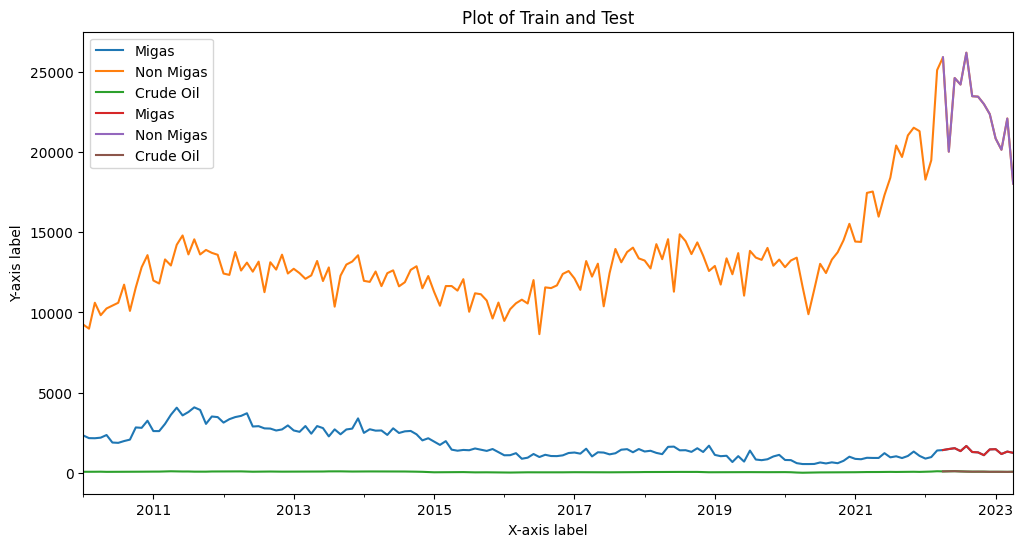

In [45]:
# Create the plot
fig, ax = plt.subplots(figsize=(12, 6))
train_df.plot(ax=ax, label='Train')
test_df.plot(ax=ax, label='Test')

# Add labels and title to the plot
plt.xlabel('X-axis label')
plt.ylabel('Y-axis label')
plt.title('Plot of Train and Test')

# Add legend
plt.legend()

# Display the plot
plt.show()

## Find out number of lags to consider


In [46]:
from statsmodels.tsa.api import VAR

model = VAR(train_df.diff()[1:])
sorted_order=model.select_order(maxlags=10)
print(sorted_order.summary())

 VAR Order Selection (* highlights the minimums)  
       AIC         BIC         FPE         HQIC   
--------------------------------------------------
0        29.35       29.41   5.580e+12       29.37
1        28.85      29.09*   3.390e+12      28.95*
2        28.82       29.24   3.269e+12       28.99
3       28.79*       29.39  3.180e+12*       29.03
4        28.83       29.62   3.336e+12       29.15
5        28.81       29.78   3.255e+12       29.20
6        28.88       30.03   3.497e+12       29.35
7        28.94       30.27   3.725e+12       29.48
8        28.98       30.49   3.898e+12       29.60
9        29.01       30.70   4.021e+12       29.70
10       29.02       30.89   4.066e+12       29.78
--------------------------------------------------


c:\Users\Bima\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


## Modelling

In [47]:
from statsmodels.tsa.statespace.varmax import VARMAX

# var_model=VARMAX(train_df,order=(9,10),enforce_stationarity=True)
# fitted_model=var_model.fit(disp=False)

In [48]:
# print(fitted_model.summary())

## Deploy models

In [50]:
import joblib

In [51]:
# # Save the model to a file
# joblib.dump(fitted_model, 'Model/ekspor_var_model.pkl')

In [55]:
# Load the model from the file
fitted_model = joblib.load('Model/ekspor_var_model.pkl')

## Test data prediction

In [56]:
predict=fitted_model.get_prediction(start=len(train_df)-len(test_df),end=len(train_df)-1)
predictions=predict.predicted_mean
predictions.columns=['Migas Prediction', 'Non Migas Prediction', 'Crude Oil Prediction']
predictions=predictions.abs()
predictions

,Migas Prediction,Non Migas Prediction,Crude Oil Prediction
2022-04-01,1409.064714,23608.097071,110.916940
2022-05-01,1654.173389,21833.664759,104.065979
2022-06-01,1652.351209,22603.517233,117.455411
2022-07-01,1633.331048,24346.415066,110.260038
2022-08-01,1666.327576,24891.851658,94.073991
2022-09-01,1373.346635,22869.303081,92.424393
2022-10-01,1214.272397,23109.748765,89.793465
2022-11-01,1166.565744,23589.725277,88.042017
2022-12-01,1266.065111,23237.104638,82.360608
2023-01-01,1432.623027,21314.956234,77.390809


In [57]:
predictions.to_csv('4. predictions.csv')

<Axes: >

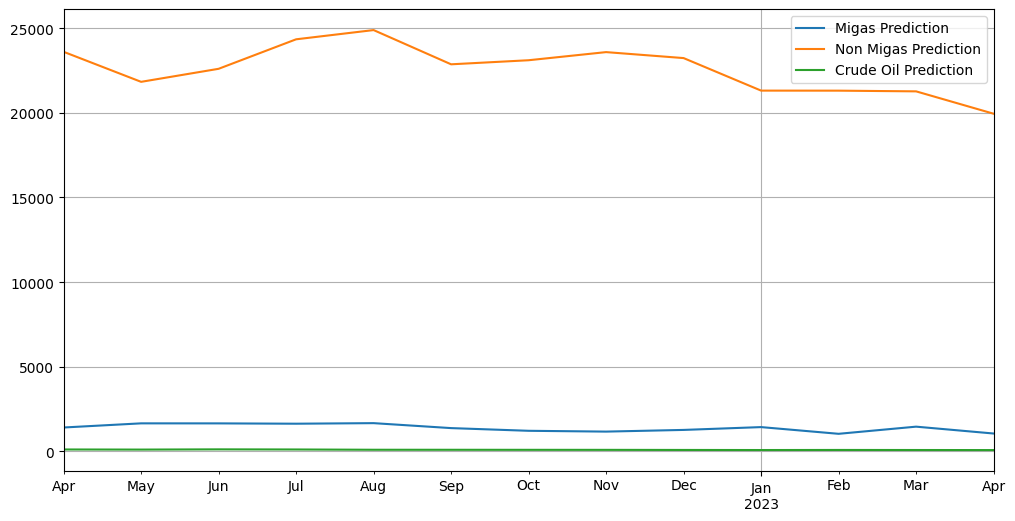

In [58]:
predictions.plot(figsize=(12,6), grid=True)

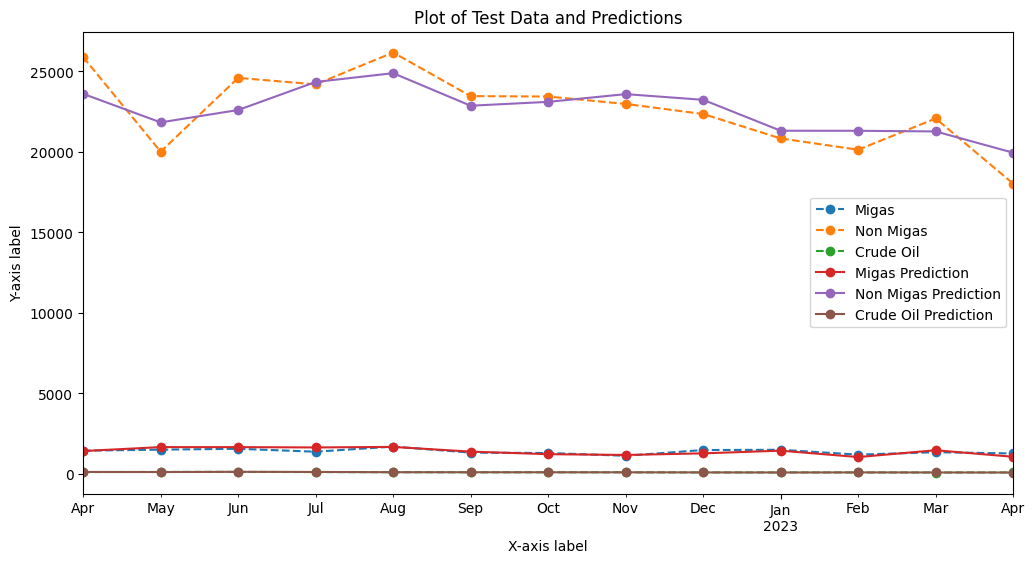

In [59]:
# Create the plot
fig, ax = plt.subplots(figsize=(12, 6))
test_df.plot(ax=ax, linestyle='dashed', marker='o', label='DataFrame 1')
predictions.plot(ax=ax, marker='o', label='DataFrame 2')

# Add labels and title to the plot
plt.xlabel('X-axis label')
plt.ylabel('Y-axis label')
plt.title('Plot of Test Data and Predictions')

# Add legend
plt.legend()

# Display the plot
plt.show()

In [60]:
test_df

,Migas,Non Migas,Crude Oil
Date,,,
2022-04-01,1433.3,25889.0,103.919000
2022-05-01,1496.1,20013.7,111.415238
2022-06-01,1549.3,24600.8,116.580000
2022-07-01,1367.9,24195.3,102.051000
2022-08-01,1686.5,26175.6,93.654783
2022-09-01,1310.5,23466.7,86.198095
2022-10-01,1288.1,23440.3,88.488095
2022-11-01,1114.1,22979.9,86.307143
2022-12-01,1472.8,22355.0,78.330476


In [61]:
predictions

,Migas Prediction,Non Migas Prediction,Crude Oil Prediction
2022-04-01,1409.064714,23608.097071,110.916940
2022-05-01,1654.173389,21833.664759,104.065979
2022-06-01,1652.351209,22603.517233,117.455411
2022-07-01,1633.331048,24346.415066,110.260038
2022-08-01,1666.327576,24891.851658,94.073991
2022-09-01,1373.346635,22869.303081,92.424393
2022-10-01,1214.272397,23109.748765,89.793465
2022-11-01,1166.565744,23589.725277,88.042017
2022-12-01,1266.065111,23237.104638,82.360608
2023-01-01,1432.623027,21314.956234,77.390809


In [62]:
# Perform a join on the index
merged_df = test_df.join(predictions)

# Specify the desired column order
column_order = ['Migas', 'Migas Prediction', 'Non Migas', 'Non Migas Prediction', 'Crude Oil', 'Crude Oil Prediction']

# Reorder the columns
merged_df = merged_df[column_order]
merged_df

,Migas,Migas Prediction,Non Migas,Non Migas Prediction,Crude Oil,Crude Oil Prediction
Date,,,,,,
2022-04-01,1433.3,1409.064714,25889.0,23608.097071,103.919000,110.916940
2022-05-01,1496.1,1654.173389,20013.7,21833.664759,111.415238,104.065979
2022-06-01,1549.3,1652.351209,24600.8,22603.517233,116.580000,117.455411
2022-07-01,1367.9,1633.331048,24195.3,24346.415066,102.051000,110.260038
2022-08-01,1686.5,1666.327576,26175.6,24891.851658,93.654783,94.073991
2022-09-01,1310.5,1373.346635,23466.7,22869.303081,86.198095,92.424393
2022-10-01,1288.1,1214.272397,23440.3,23109.748765,88.488095,89.793465
2022-11-01,1114.1,1166.565744,22979.9,23589.725277,86.307143,88.042017
2022-12-01,1472.8,1266.065111,22355.0,23237.104638,78.330476,82.360608


In [63]:
merged_df.to_csv('5. merged_df.csv')

## Error Measurement

In [64]:
# import statistics
import math

def avg(arr):
    return sum(arr) / len(arr)

In [65]:
predictions.shape

(13, 3)

In [66]:
test_df_error=test_df
test_df_error.columns=['Migas Prediction', 'Non Migas Prediction', 'Crude Oil Prediction']

In [67]:
MSE = []
MAE = []
RMSE = []
RSq = []
cols = predictions.columns

for col in cols:
    actual = test_df_error[col].to_numpy()
    pred = predictions[col].to_numpy()
    d = actual-pred
    mse = avg(d*d)
    mae = avg(abs(d))
    rmse = math.sqrt(mse)
    rsq = 1-(sum((d*d)/sum(pow(actual-avg(actual),2))))

    print("Attribute: ", col)
    print("Mean Square Error: ", mse)
    print("Mean Absolute Error: ", mae)
    print("Root Mean Square Error: ", rmse)
    print("R-Squared Error: ", rsq)
    print()

    MSE.append(mse)
    MAE.append(mae)
    RMSE.append(rmse)
    RSq.append(rsq)

Attribute:  Migas Prediction
Mean Square Error:  18792.57047386693
Mean Absolute Error:  115.26184785984037
Root Mean Square Error:  137.0859966366621
R-Squared Error:  0.1774733623521344

Attribute:  Non Migas Prediction
Mean Square Error:  1673941.2930768062
Mean Absolute Error:  1103.133796579357
Root Mean Square Error:  1293.8088317355105
R-Squared Error:  0.6840629499130071

Attribute:  Crude Oil Prediction
Mean Square Error:  23.327170899169662
Mean Absolute Error:  4.120203204214255
Root Mean Square Error:  4.829821000737984
R-Squared Error:  0.8650862022577036



In [68]:
# Create a DataFrame from the variables
error_df = pd.DataFrame({'cols': cols, 'MSE': MSE, 'MAE': MAE, 'RMSE': RMSE, 'RSq': RSq})

# Set 'cols' as the index
error_df = error_df.set_index('cols')
error_df

,MSE,MAE,RMSE,RSq
cols,,,,
Migas Prediction,1.879257e+04,115.261848,137.085997,0.177473
Non Migas Prediction,1.673941e+06,1103.133797,1293.808832,0.684063
Crude Oil Prediction,2.332717e+01,4.120203,4.829821,0.865086


In [69]:
error_df.to_csv('6. error_df.csv')

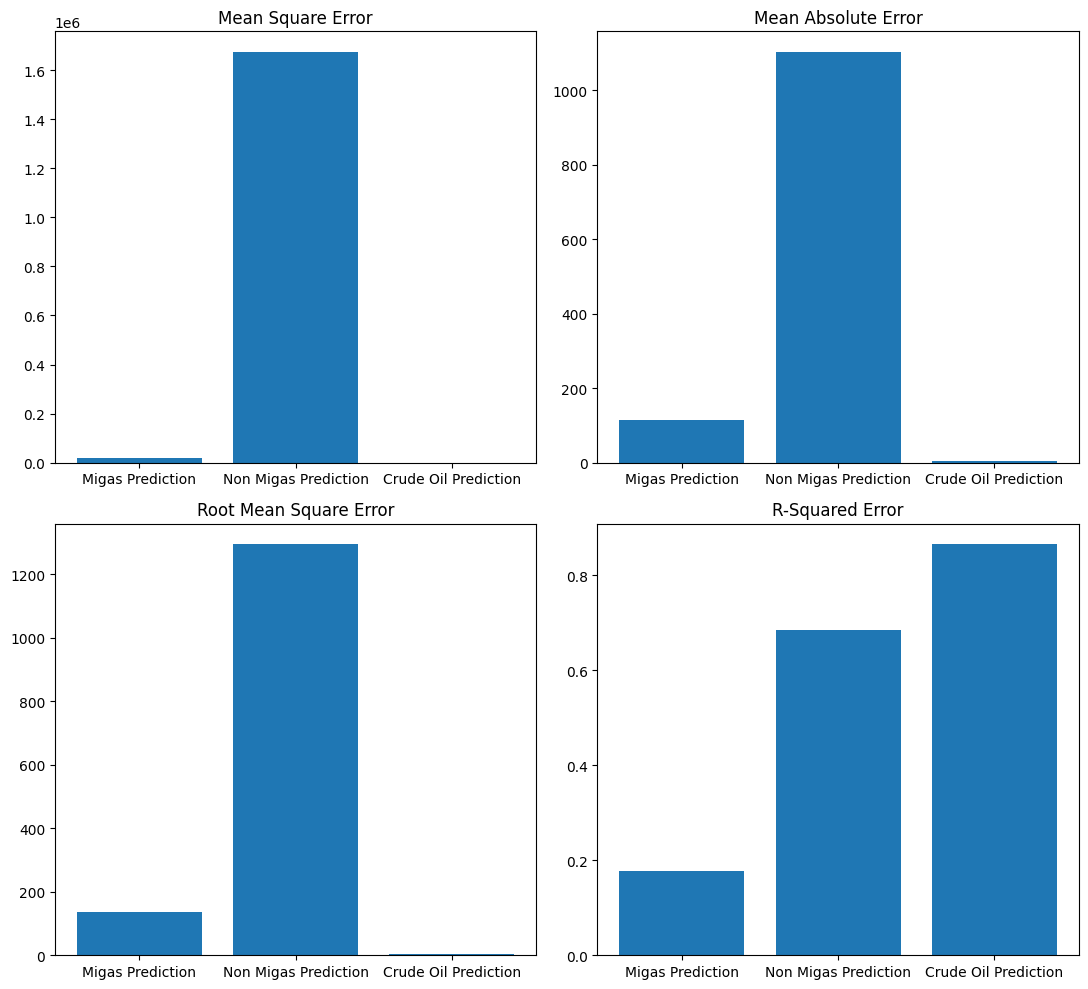

In [70]:
# Create a 2x2 grid of subplots
fig, axs = plt.subplots(2, 2, figsize=(11, 10))

# Plot MSE
axs[0, 0].bar(cols, MSE)
axs[0, 0].set_title("Mean Square Error")

# Plot MAE
axs[0, 1].bar(cols, MAE)
axs[0, 1].set_title("Mean Absolute Error")

# Plot RMSE
axs[1, 0].bar(cols, RMSE)
axs[1, 0].set_title("Root Mean Square Error")

# Plot RSq
axs[1, 1].bar(cols, RSq)
axs[1, 1].set_title("R-Squared Error")

# Adjust spacing between subplots
plt.tight_layout()

# Show the plot
plt.show()

## Predictions from April 2023 to December 2024

In [71]:
predict=fitted_model.get_prediction(start=len(df)-1, end=len(df)+19)
forecast=predict.predicted_mean
forecast.columns=['Migas Prediction', 'Non Migas Prediction', 'Crude Oil Prediction']
forecast=forecast.abs()
forecast

,Migas Prediction,Non Migas Prediction,Crude Oil Prediction
2023-04-01,1053.462429,19949.815190,74.985542
2023-05-01,1450.441616,18573.687217,84.119862
2023-06-01,1465.279195,18652.693503,83.800927
2023-07-01,1518.284873,19271.778911,80.653934
2023-08-01,1566.411704,17726.758605,78.280394
2023-09-01,1585.790547,17390.547578,76.700632
2023-10-01,1519.434807,17359.815555,72.602911
2023-11-01,1447.836726,17087.901579,68.918513
2023-12-01,1594.917434,16207.909511,67.490689
2024-01-01,1376.486476,15630.501185,67.198914


In [72]:
forecast.to_csv('7. forecast.csv')

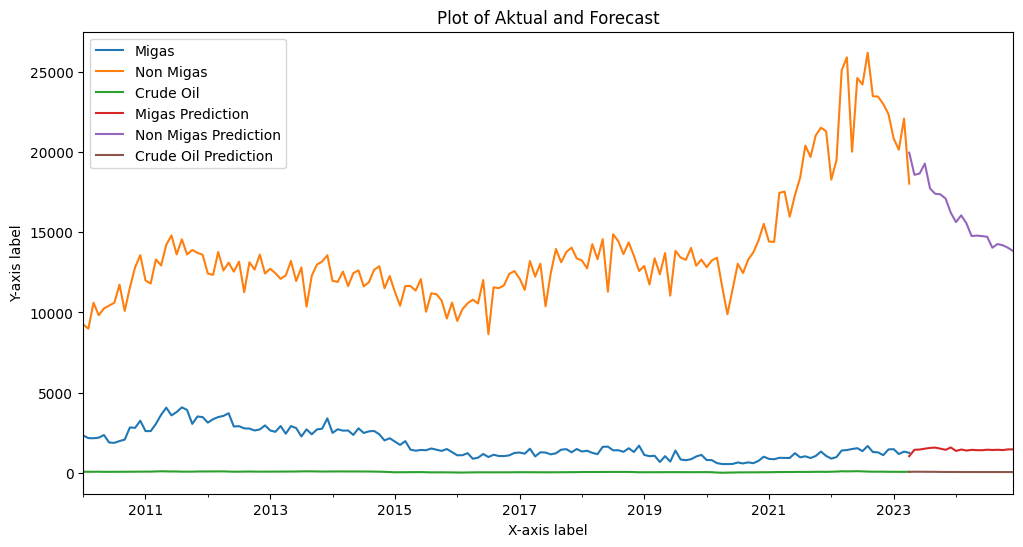

In [73]:
# Create the plot
fig, ax = plt.subplots(figsize=(12, 6))
df.plot(ax=ax, label='Aktual')
forecast.plot(ax=ax, label='Forecast')

# Add labels and title to the plot
plt.xlabel('X-axis label')
plt.ylabel('Y-axis label')
plt.title('Plot of Aktual and Forecast')

# Add legend
plt.legend()

# Display the plot
plt.show()

## Predictions for 2024

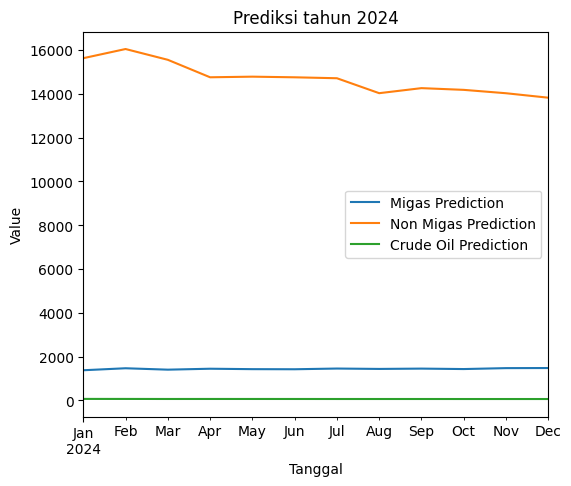

In [74]:
# Filter rows for the time range of 2024
filtered_forecast = forecast['2024-01-01':]

# Plot forecast columns
fig, ax = plt.subplots(figsize=(6, 5))
filtered_forecast.plot(ax=ax, label='Forecast')

# Set plot title and axis labels
plt.title('Prediksi tahun 2024')
plt.xlabel('Tanggal')
plt.ylabel('Value')

# Display the plot
plt.show()

In [75]:
filtered_forecast

,Migas Prediction,Non Migas Prediction,Crude Oil Prediction
2024-01-01,1376.486476,15630.501185,67.198914
2024-02-01,1467.278607,16049.183939,65.966791
2024-03-01,1403.231409,15556.684130,64.061845
2024-04-01,1445.854624,14758.263419,64.658395
2024-05-01,1426.431532,14786.506856,64.426434
2024-06-01,1421.800133,14757.384200,63.924191
2024-07-01,1454.330608,14714.630738,63.223638
2024-08-01,1436.891282,14032.236958,62.962961
2024-09-01,1451.383818,14262.459330,63.143364
2024-10-01,1431.004060,14183.743606,62.443950


# Summary
Berdasarkan penelitian di atas, didapatkan beberapa kesimpulan sebagai berikut.

1. Hasil prediksi menunjukan Nilai atau Pendapatan Ekspor Non-Migas Indonesia mengalami penurunan yang cukup signifikan pada tahun 2024 dibandingkan dengan tahun-tahun sebelumnya. Hal ini sejalan dengan penurunan pendapatan Ekspor Migas dan harga Crude Oil pada tahun yang sama.
2. Dari hasil prediksi tersebut, seperti yang tercantum pada kesimpulan nomor satu, dapat disimpulkan bahwa harga Crude Oil berpengaruh positif terhadap Nilai Ekspor Non-Migas. Harga Crude Oil mempengaruhi potensi pendapatan Ekspor Non-Migas. Semakin tinggi harga Crude Oil, semakin tinggi juga potensi pendapatan Ekspor Non-Migas, dan berlaku sebaliknya. Selain itu, Nilai Ekspor Migas juga berpengaruh positif terhadap Nilai Ekspor Non-Migas, hanya saja pengaruh yang diberikan tidak sesignifikan harga Crude Oil.
3. Menindaklanjuti gambaran permasalahan pada kesimpulan nomor satu, mengenai prediksi turunnya potensi pendapatan Ekspor Non-Migas, peneliti menawarkan solusi untuk pihak yang berkaitan dalam bentuk sepuluh rekomendasi komoditi Ekspor Non-Migas yang dapat diekspor pada tahun 2024. Rekomendasi tersebut diambil berdasarkan komoditi dengan penyumbang pendapatan terbanyak selama lima tahun terakhir (2018-2022) meliputi Komoditi Bahan Bakar Mineral, Lemak dan Minyak Hewan/Nabati, Besi dan Baja, Mesin/Peralatan Listrik, Kendaraan dan Bagiannya, Perhiasan/Permata, Karet dan Barang dari Karet, Mesin-Mesin/ Pesawat Mekanik, Berbagai Produk Kimia, serta Bijih, Kerak, dan Abu Logam. Rekomendasi tersebut diberikan agar hasil prediksi dapat dicegah dan memperbaiki nilai Ekspor Non-Migas demi kemajuan ekonomi Indonesia.